### Objectives:

- To plot the empirical and the theoretical distribution of the overall data without regard to classes.
- To plot the empirical and the theoretical distribution of the data of each class.

In this lab, we will look at how python can be used to analyze data using the pandas data analysis package, and how we can model data using probability distributions studied in class.

We will be using a data file which has been extracted from the Iris Flower Data Set, which is perhaps the best known database to be found in the pattern recognition literature. The original dataset consists of 50 samples from each of three species of Iris (setosa, versicolor and virginica). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For more information, please see the following page at the UCI Machine Learning Repository: 

https://archive.ics.uci.edu/ml/datasets/iris

In this problem, we will be working with a smaller dataset, which consider only two types of irises: setosa and virginica, and one random variable: petal length.

Use the file "Lab4_iris_petal_length.xlsx" to complete the lab. 

We recommend you use the pandas package, the numpy package and the scipy and matplotlib.pyplot libraries in python, as you have done in previous labs.

After you have completed the notebook, export it as pdf for submission. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

We first load the datafile using the **pandas.read_excel** function into a a **pandas.DataFrame**. 

In [1]:
# load pandas, a data analysis package
# load numpy, a scientific computing package
# load scipy.stats, a module contains probability functions
# load matplotlib.pyplot, a framework provides a Matlab-like plotting
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data = pd.read_excel('Lab4_Iris_petal_length.xlsx',index_col = 'Index') #read data from excel

There are 100 entries in total in this data set.  The first 50 entries contains measurements of petal length from irises in the  **setosa** class. We can see a few examples using the **pandas.DataFrame.head** function, which returns the **first** few entries in the data frame.

In [2]:
data.head()

,Petal length,Class
Index,,
1,1.4,Iris-setosa
2,1.4,Iris-setosa
3,1.3,Iris-setosa
4,1.5,Iris-setosa
5,1.4,Iris-setosa


The last 50 entries contain measurements of the petal length from irises in the **virginica** class.  We can see a few examples using the **pandas.DataFrame.tail** function, which returns the **last** few entries in the data frame.

In [3]:
data.tail()

,Petal length,Class
Index,,
96,5.2,Iris-virginica
97,5.0,Iris-virginica
98,5.2,Iris-virginica
99,5.4,Iris-virginica
100,5.1,Iris-virginica


From these lines, you should get the general idea that the petals of virginica irises are generally longer than the petals of setosa irises. Thus, if you observe an iris with longer petals, it is "more likely" to be a virginica than a setosa. Similarly, if you observe an iris with shorter petals, it is "more likely" to be a setosa. This assignment makes this intuition more precise using probability theory.

### Part a (5 points) : 
Plot the normalized histogram of the petal length for all the data without regard to which species from 0 to 7 with bin size 0.2. The normalized histogram is the count in each bin divided by the number of observations and divided by the bin width. In python, this can be selected by passing "density=True" into the **matplotlib.pyplot.hist** or **pandas.DataFrame.hist** functions.

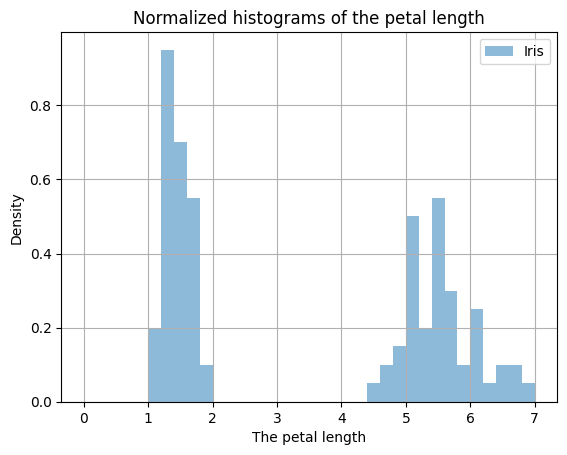

In [4]:
# put your code below and print out the result after running your code 
# =====================================================================

#Histogram of all data
b = np.arange(0, 7 + 0.2, 0.2)
fig, ax = plt.subplots()

data.hist(bins = b, density = True, label = "Iris", alpha = 0.5, ax = ax)
ax.legend()
plt.title('Normalized histograms of the petal length')
plt.xlabel('The petal length')
plt.ylabel('Density')
plt.show()

### Part b (6 points) : 
Calculate empirical mean $m$ and standard deviation $\sigma$ of the petal length over all of the data without regard to species. For a set of data $\{r_1,r_2,⋯,r_n\}$, the empirical mean is given by 

$m=\frac{1}{n}\sum_{i=1}^{n}r_i$

and the empirical standard deviation is given by 

$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

If you have read the data using the pandas package, then you can compute the mean and standard deviation easily using the **pandas.DataFrame.mean** and **pandas.DataFrame.std** functions. Print the two computed values properly.

In [5]:
# put your code below and print out the result after running your code 
# =====================================================================
mean = data["Petal length"].mean()
SD = data["Petal length"].std()
print('The empirical mean = {}'.format(mean))
print('The empirical standard deviation = {}'.format(SD))


The empirical mean = 3.5079999999999996
The empirical standard deviation = 2.0942287218434235


### Part c (8 points) : 
Assume that the probability density function of the petal length, $f_X(x)$, is given by a Gaussian distribution with mean and standard deviation computed in **Part b**. You can compute values of the Gaussian distribution in python using the **scipy.stats.norm.pdf** function. Note that the Gaussian distribution is also called the normal distribution.

Compare the normalized histogram in **Part a** with the plot of $f_X(x)$ by plotting both together in the same figure for $x$ from 0 to 7.

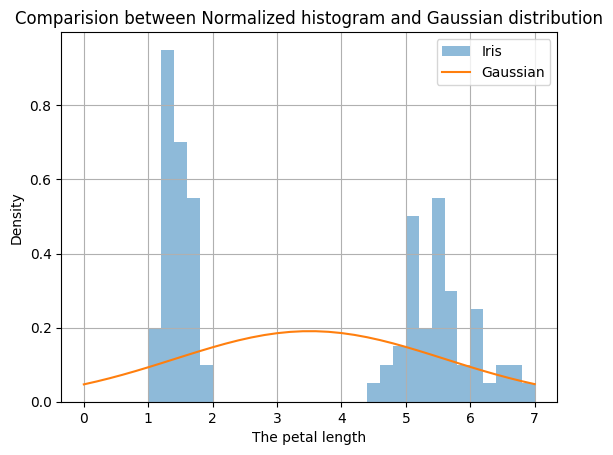

In [6]:
# put your code below and print out the result after running your code 
# =====================================================================


#plot the histo
b = np.arange(0, 7 + 0.2, 0.2)
fig, ax = plt.subplots()
data.hist(bins = b, density = True, label = "Iris", alpha = 0.5, ax = ax)
ax.legend()



#calculate for the noramldist
mu = mean  
sigma = SD 
x = np.arange(0, 7 + 0.2, 0.2)  
pdf_values = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)


#plot the noramldist
plt.plot(x, pdf_values, label='Gaussian')
plt.xlabel('The petal length')
plt.ylabel('Density')
plt.legend()

plt.title('Comparision between Normalized histogram and Gaussian distribution')
plt.show()

#line only?

Does this look like a good model of the data? Why?

### Part c Answer :
Answer: 

No, it doesn't.

This Guassian model is quite different from the distribution of pedals length in data, since it makes assumption that the iris with petal length closer to the mean is more likely to exist.

However, the petal length of the iris in the data is derivated from the mean since they are not normally distributed






Now let us generate plots of normalized histogram of the petal length for each species separately. We separate data into different groups using the **pandas.DataFrame.groupby** command (we had introduced this command in Lab 2). Then for each group, we use the **pandas.DataFrame.hist** command to plot the histogram. As above, we use bins from 0 to 7 with bin size 0.2.

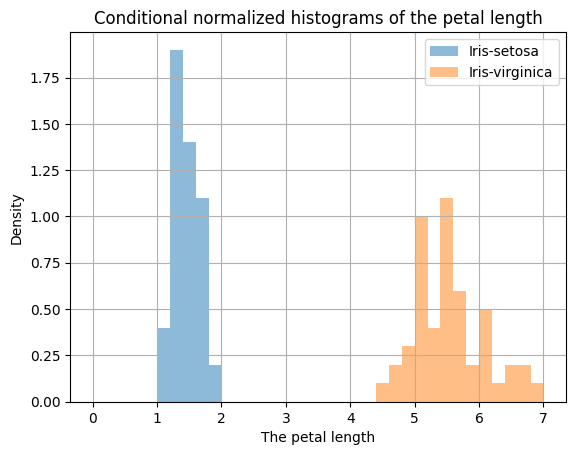

In [7]:
# create groups
groups = data.groupby('Class')['Petal length']

# plot histograms for each species
b = np.arange(0, 7 + 0.2, 0.2)
fig, ax = plt.subplots()
for name, group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax = ax)

# label plots
ax.legend()
plt.title('Conditional normalized histograms of the petal length')
plt.xlabel('The petal length')
plt.ylabel('Density')
plt.show()

### Part d (10 points) :
Use your knowledge of probability to model probability distributions of the petal lengths given setosa and virginica, $f_{X|species}(x|setosa)$ and $f_{X|species}(x|virginica)$. For each species, compare the normalized histogram with the conditional density by plotting them both in the same figure for $x$ from 0 to 7. For plotting conditional desities, use bin size of 0.05 to obtain smooth curves.

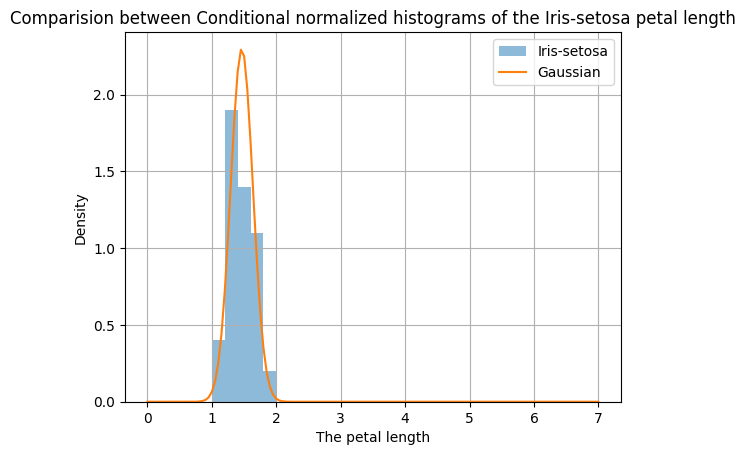

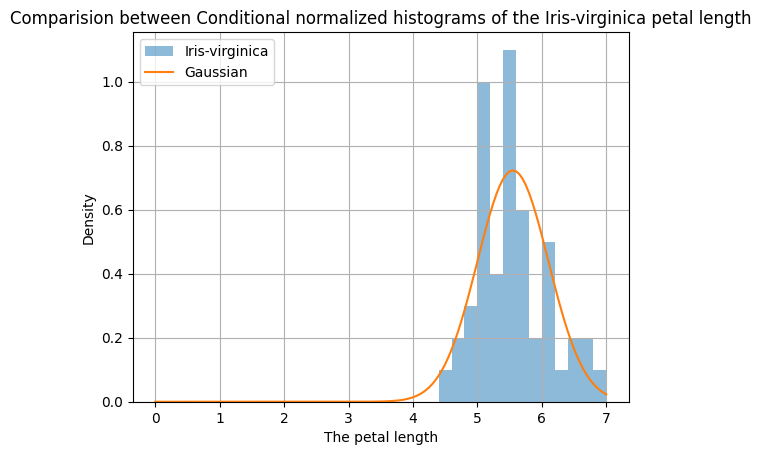

In [8]:
# put your code below and print out the result after running your code 
# =====================================================================
groups = data.groupby('Class')['Petal length']



for name, group in groups:
    #plot the conditional histogram
    fig, ax = plt.subplots()
    b = np.arange(0, 7 + 0.2, 0.2)
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax = ax)

    
    #plot the conditional model
    mu = group.mean()  
    sigma = group.std()
    x = np.arange(0, 7 + 0.05, 0.05)  
    pdf_values = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, pdf_values, label='Gaussian')

    ax.legend()
    plt.title('Comparision between Conditional normalized histograms of the ' + name + ' petal length')
    plt.xlabel('The petal length')
    plt.ylabel('Density')
    plt.show()







### Part e (9 points) : 
Use the total probability theorem to combine the two conditional densities $f_{X|species}(x|setosa)$ and $f_{X|species}(x|virginica)$ to obtain a new model distribution for the petal length, $g_X(x)$. Compare the plot of $g_X(x)$ with the normalized histogram in **Part a** by plotting both in the same figure for x from 0 to 7.

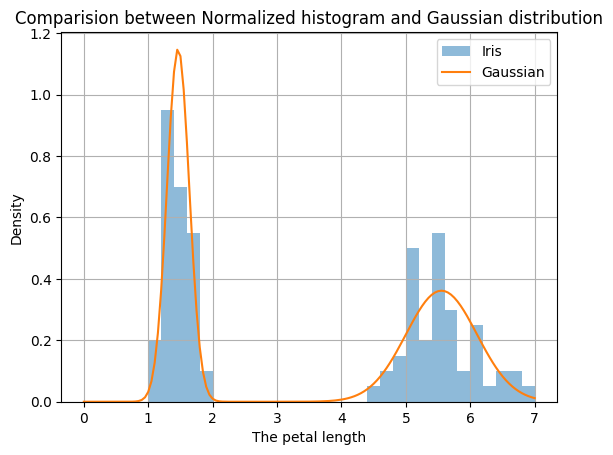

In [9]:
# put your code below and print out the result after running your code
# =====================================================================
groups = data.groupby('Class')['Petal length']


#plot the normalized histogram
b = np.arange(0, 7 + 0.2, 0.2)
fig, ax = plt.subplots()
data.hist(bins = b, density = True, label = "Iris", alpha = 0.5, ax = ax)





#Plot Guassian model by total prob. thm
mu=0
sigma = 0
pdf_values = 0

#combine the Gauss
for name, group in groups:
    mu = group.mean()  
    sigma = group.std()  
    pdf_values += 0.5*scipy.stats.norm.pdf(x, loc=mu, scale=sigma)


x = np.arange(0, 7 + 0.05, 0.05)
plt.plot(x, pdf_values, label='Gaussian')





#label the graph
plt.xlabel('The petal length')
plt.ylabel('Density')
plt.legend()

plt.title('Comparision between Normalized histogram and Gaussian distribution')
plt.show()


How does this compare with the single Gaussian assumption in Part c?

### Part e Answer :
The Gaussian model in part e is better than that in Part c.

With the use of total probability thm., the pedal lengths of the iris are separated into two group, each approximated by the gaussian model with its own mean and SD.

Then the gaussian model are combined together with the weighting of the probability of existence of each group.

As a result, the value of the Combined Gaussain model is closer to the normalized histgram of the data than the single Guassian assumption.


